In [1]:
import pandas as pd
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize
from nltk import pos_tag,ne_chunk
from nltk.stem import  PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from scipy.sparse import hstack

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[

In [207]:
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")


In [208]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [183]:
df["Class Name"].value_counts()

Class Name
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: count, dtype: int64

In [184]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [185]:
df.drop(columns=["Clothing ID","Unnamed: 0","Title"],inplace=True)

In [186]:

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [187]:
df

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...
22623,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
22624,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
22625,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
22626,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [188]:
df["Class Name"].value_counts()


Class Name
Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: count, dtype: int64

group this less class into the similar class for predection

In [189]:
def group_categories(row):
    if row['Class Name'] in ['Knits', 'Fine gauge']:
        return 'Knits'
    elif row['Class Name'] in ['Jackets', 'Outerwear']:
        return 'Jackets & Outerwear'
    elif row['Class Name'] in ['Lounge', 'Sleep', 'Layering']:
        return 'Lounge & Sleepwear'
    elif row['Class Name'] in ['Swim', 'Shorts']:
        return 'Swimwear & Shorts'
    elif row['Class Name'] in ['Legwear', 'Casual bottoms']:
        return 'Legwear & Casual Bottoms'
    elif row['Class Name'] in ['Intimates', 'Chemises']:
        return 'Intimates'
    else:
        return row['Class Name']

In [190]:

df['Grouped Category'] = df.apply(group_categories, axis=1)


In [191]:
df["Grouped Category"].value_counts()

Grouped Category
Dresses                     6145
Knits                       5685
Blouses                     2983
Sweaters                    1380
Pants                       1350
Jeans                       1104
Lounge & Sleepwear          1015
Jackets & Outerwear         1002
Skirts                       903
Swimwear & Shorts            636
Legwear & Casual Bottoms     159
Intimates                    148
Trend                        118
Name: count, dtype: int64

In [196]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
def pre_procesing(text):
    text = text.lower()
    tokens = word_tokenize(text)
    #tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [ ]:
df["Review Text"]=df["Review Text"].apply(pre_procesing)


In [198]:
vector = TfidfVectorizer()
X= vector.fit_transform(df["Review Text"])

In [199]:
"""tfidf_df = pd.DataFrame(X.toarray(), columns=vector.get_feature_names_out())"""
df.drop(columns=["Review Text","Class Name"],inplace=True)

In [200]:
from sklearn.preprocessing import LabelEncoder
labelenoder=LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col]=labelenoder.fit_transform(df[col])


In [166]:
df

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Grouped Category
0,33,4,1,0,2,2,2
1,34,5,1,4,0,1,1
2,60,3,0,0,0,1,1
3,50,5,1,0,1,0,8
4,47,5,1,6,0,4,0
...,...,...,...,...,...,...,...
22623,34,5,1,0,1,1,1
22624,48,3,1,0,1,4,5
22625,31,3,0,1,1,1,1
22626,28,3,1,2,0,1,1


In [167]:
df.loc[df["Age"] >= 70, ["Age","Grouped Category"]]

,Age,Grouped Category
93,83,5
123,71,3
202,72,9
225,83,0
266,83,5
...,...,...
22331,70,1
22358,74,1
22395,74,9
22489,73,1


C:\Users\Admin\AppData\Local\Temp\ipykernel_2880\3770786005.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


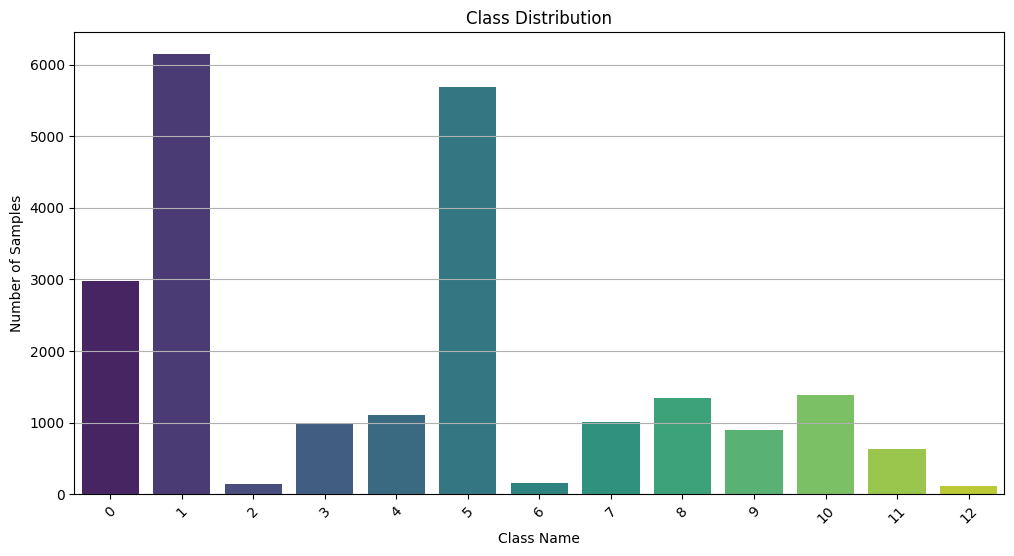

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df and the target variable is "Class Name"
class_distribution = df['Grouped Category'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class Name')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


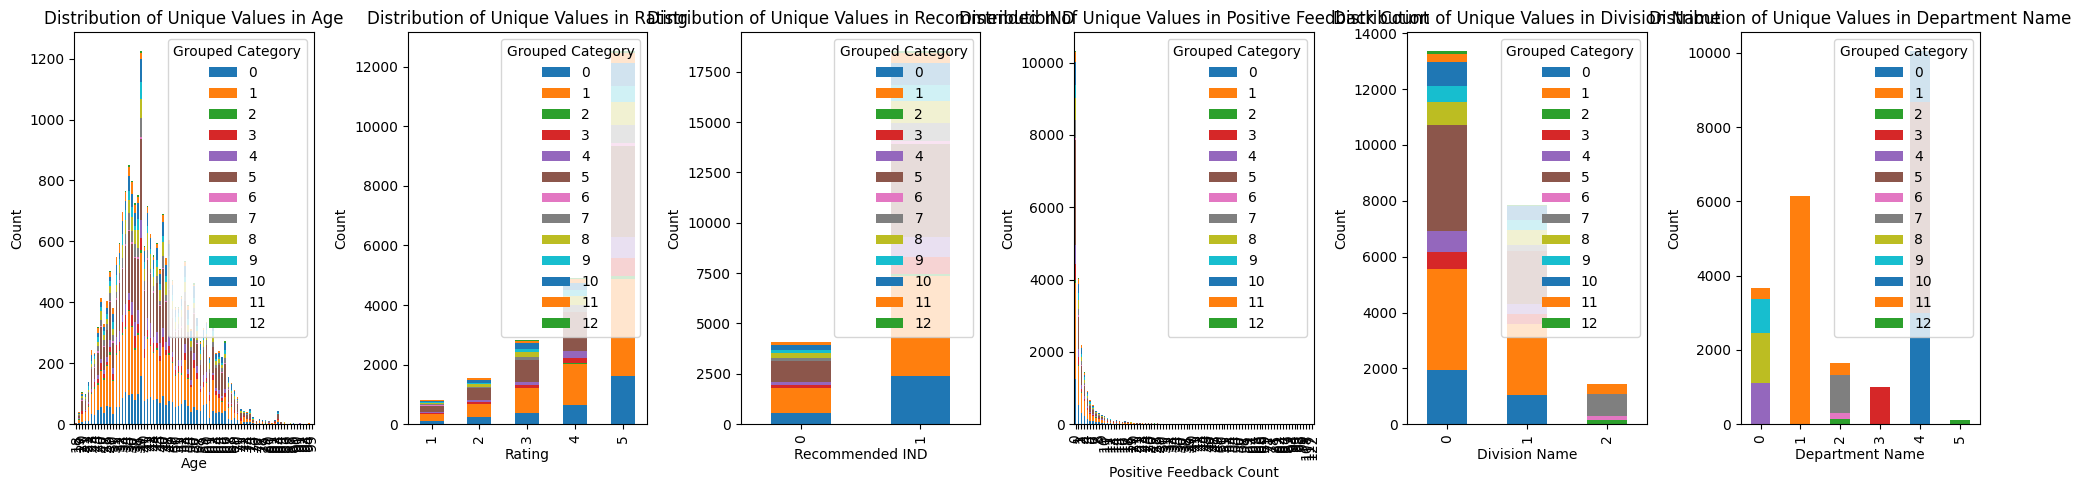

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



feature_columns = df.drop(columns=["Grouped Category"]).columns

# Create a figure for the stacked bar charts
fig, axes = plt.subplots(1, len(feature_columns), figsize=(20, 5))

# Plotting for each feature column
for i, feature in enumerate(feature_columns):
    # Get counts of each unique value in the feature based on 'Grouped Category'
    counts = df.groupby([feature, 'Grouped Category']).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart
    counts.plot(kind='bar', stacked=True, ax=axes[i], color=plt.cm.tab10.colors)
    
    axes[i].set_title(f'Distribution of Unique Values in {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Grouped Category', loc='upper right')

plt.tight_layout()
plt.show()



In [201]:
X_numerical = df[["Age", 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name']].values  # Convert to array
Xt= hstack([X, X_numerical])

In [202]:
y=df["Grouped Category"]

upper sample

In [203]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(Xt, y)

both under sample and upper sample

In [18]:
sample_size = 2000

df_balanced = df.groupby('Grouped Category').apply(lambda x: x.sample(n=min(sample_size, len(x)), random_state=42))

df_balanced = df_balanced.reset_index(drop=True)



C:\Users\Admin\AppData\Local\Temp\ipykernel_2868\4227718565.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('Grouped Category').apply(lambda x: x.sample(n=min(sample_size, len(x)), random_state=42))


In [107]:
y_resampled.value_counts()

Grouped Category
2     6145
1     6145
8     6145
0     6145
5     6145
3     6145
7     6145
10    6145
9     6145
11    6145
12    6145
4     6145
6     6145
Name: count, dtype: int64

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

x_train, x_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, random_state=42, test_size=0.2, shuffle=True, stratify=y_resampled
)

# You can proceed with training your model now
model = LogisticRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5078550416223321
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.09      0.14      1229
           1       0.81      0.61      0.70      1229
           2       0.41      0.74      0.52      1229
           3       0.64      0.82      0.72      1229
           4       0.44      0.69      0.54      1229
           5       0.33      0.48      0.39      1229
           6       0.56      0.31      0.40      1229
           7       0.38      0.39      0.38      1229
           8       0.56      0.46      0.50      1229
           9       0.93      0.83      0.88      1229
          10       0.65      0.32      0.43      1229
          11       0.03      0.02      0.02      1229
          12       0.52      0.85      0.65      1229

    accuracy                           0.51     15977
   macro avg       0.52      0.51      0.48     15977
weighted avg       0.52      0.51      0.48     15977

Confusion Matrix:
 [[ 105 

d:\machine_learn_projects\text_classification\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [205]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 995    4    0    2    0  223    0    0    0    0    5    0    0]
 [   2 1209    0    4    0    1    0    1    4    5    2    1    0]
 [   0    0 1226    0    0    0    0    3    0    0    0    0    0]
 [   2    1    0 1222    0    3    0    0    0    0    1    0    0]
 [   0    5    0    0 1208    0    0    0   15    1    0    0    0]
 [ 185    4    0    8    0  928    0    2    0    0  102    0    0]
 [   0    0    0    0    0    0 1227    2    0    0    0    0    0]
 [   0   10    0    2    0    2    0 1213    1    0    0    1    0]
 [   0   10    0    0    9    2    0    0 1207    1    0    0    0]
 [   0    5    0    0    3    1    0    0    3 1217    0    0    0]
 [   5    4    0    1    0   64    0    0    0    0 1155    0    0]
 [   0    0    0    0    1    0    0    4    0    0    0 1224    0]
 [   0    0    0    0    0    1    0    0    0    0    0    0 1228]]

Classification Report:
              precision    recall  f1-score   support

           0      

In [35]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)

# Step 5: Make predictions
y_pred = nb.predict(x_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1225    4    0    0    0    0    0    0    0    0    0    0    0]
 [   0 1147   60   17    0    1    2    2    0    0    0    0    0]
 [   0    9 1212    2    0    0    0    6    0    0    0    0    0]
 [   0   10    0 1186    0   32    1    0    0    0    0    0    0]
 [   0   15    0    0 1195    0    0    0   19    0    0    0    0]
 [   0   12    3   45    0 1058   10   15    0    0   70    0   16]
 [   0    0    0    5    0    0 1200   21    2    0    0    1    0]
 [   0    8    0   23    0    1   52 1137    0    0    5    2    1]
 [   0    5    0    0   18    0    0    0 1165   18    0   23    0]
 [   0    1    0    0    0    0    0    0    8 1217    0    3    0]
 [   0    0    0    4    0    4    2    0    0    0 1150    0   69]
 [   0    0    0    0    0    0    6    3  201   64    0  953    2]
 [   0    0    0    0    0    0    0    0    0    0    3    0 1226]]

Classification Report:
              precision    recall  f1-score   support

           0      

In [36]:
from sklearn.svm import SVC


svm_model=SVC(kernel='rbf')

svm_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from keras.preprocessing.sequence import pad_sequences
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy.sparse import hstack


In [27]:
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [28]:
df.drop(columns=["Clothing ID","Unnamed: 0","Title"],inplace=True)

In [29]:

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [30]:
df["Class Name"].value_counts()

Class Name
Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: count, dtype: int64

In [31]:
df[df["Class Name"].isin([ "Casual bottoms"])]

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
11952,26,These pants have a really cute design. however...,4,1,0,General,Bottoms,Casual bottoms


In [32]:
df[df["Class Name"].isin(["Casual bottoms", "Chemises"])]

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
11952,26,These pants have a really cute design. however...,4,1,0,General,Bottoms,Casual bottoms
12946,38,This dress is comfortable and a great piece to...,4,1,0,Initmates,Intimate,Chemises


In [34]:
def group_categories(row):
    if row['Class Name'] in ['Casual bottoms', 'Pants']:
        return 'Pants'
    elif row['Class Name'] in ['Intimates', 'Chemises']:
        return 'Intimates'
    else:
        return row['Class Name']

In [35]:

df['Grouped Category'] = df.apply(group_categories, axis=1)

In [37]:
df['Grouped Category'].value_counts()

Grouped Category
Dresses       6145
Knits         4626
Blouses       2983
Sweaters      1380
Pants         1351
Jeans         1104
Fine gauge    1059
Skirts         903
Jackets        683
Lounge         669
Swim           332
Outerwear      319
Shorts         304
Sleep          214
Legwear        158
Intimates      148
Layering       132
Trend          118
Name: count, dtype: int64

In [38]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def pre_processing(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df["Review Text"] = df["Review Text"].apply(pre_processing)

In [15]:
df["Department Name"].value_counts()

Department Name
Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: count, dtype: int64

In [39]:
vector = TfidfVectorizer()
X = vector.fit_transform(df["Review Text"]).toarray()  
df.drop(columns=["Review Text", "Class Name"], inplace=True)

In [40]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = label_encoder.fit_transform(df[col])

In [41]:
X_numerical = df[["Age", 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name']].values
Xt = np.hstack([X, X_numerical])

In [43]:
y = df["Grouped Category"]

In [ ]:
y = df["Grouped Category"]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(Xt, y)

In [44]:

X_train, X_test, y_train, y_test = train_test_split(Xt,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)